In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
dataset=pd.read_csv("insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
dataset.fillna(0)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


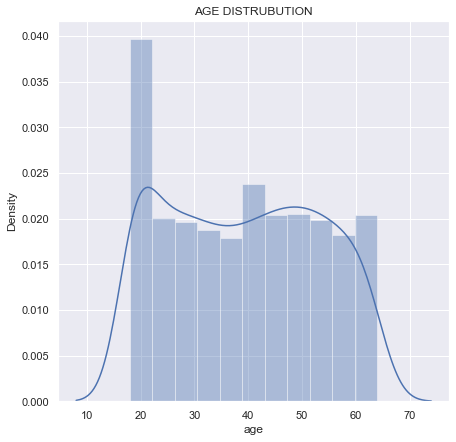

In [9]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(dataset["age"])
plt.title("AGE DISTRUBUTION")
plt.show()

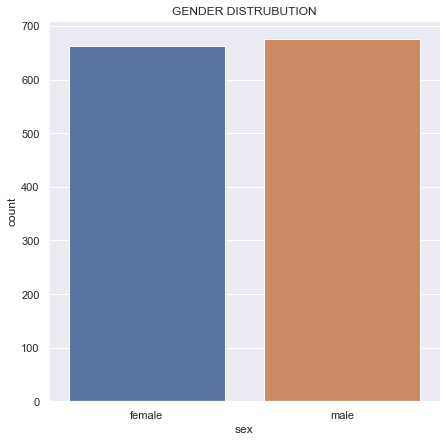

In [10]:
plt.figure(figsize=(7,7))
sns.countplot(x="sex",data=dataset)
plt.title("GENDER DISTRUBUTION")
plt.show()

In [11]:
dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

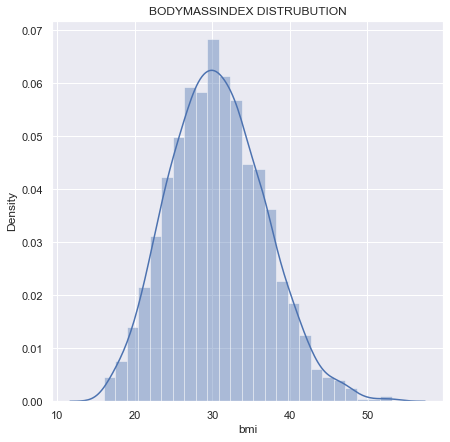

In [12]:
plt.figure(figsize=(7,7))
sns.distplot(dataset["bmi"])
plt.title("BODYMASSINDEX DISTRUBUTION")
plt.show()

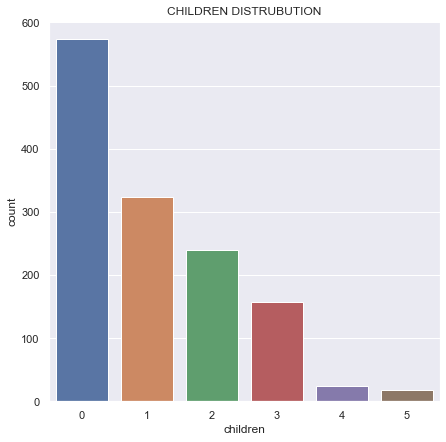

In [13]:
plt.figure(figsize=(7,7))
sns.countplot(x="children",data=dataset)
plt.title("CHILDREN DISTRUBUTION")
plt.show()

In [14]:
dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

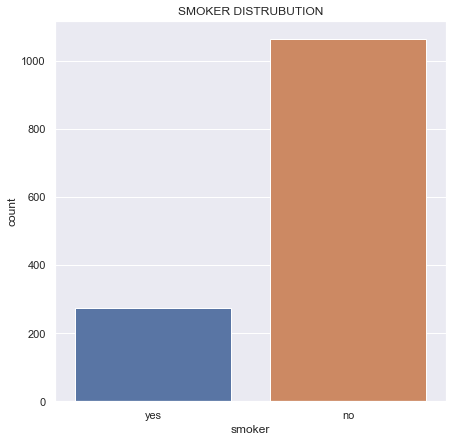

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(x="smoker",data=dataset)
plt.title("SMOKER DISTRUBUTION")
plt.show()

In [16]:
dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

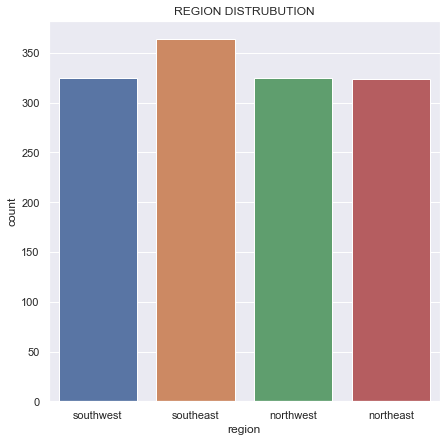

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(x="region",data=dataset)
plt.title("REGION DISTRUBUTION")
plt.show()

In [18]:
dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

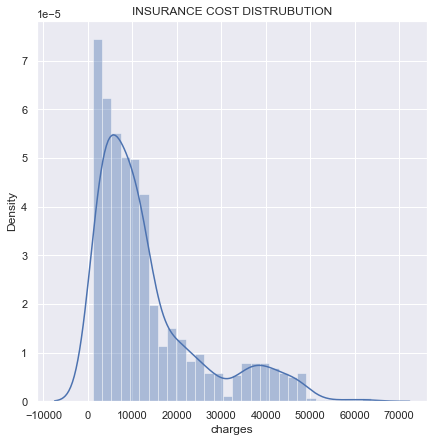

In [19]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(dataset["charges"])
plt.title("INSURANCE COST DISTRUBUTION")
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
dataset["sex"]=le_sex.fit_transform(dataset["sex"])
dataset["sex"].unique()

array([0, 1])

In [21]:

le_smoker=LabelEncoder()
dataset["smoker"]=le_smoker.fit_transform(dataset["smoker"])
dataset["smoker"].unique()

array([1, 0])

In [22]:

le_region=LabelEncoder()
dataset["region"]=le_region.fit_transform(dataset["region"])
dataset["region"].unique()

array([3, 2, 1, 0])

In [23]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


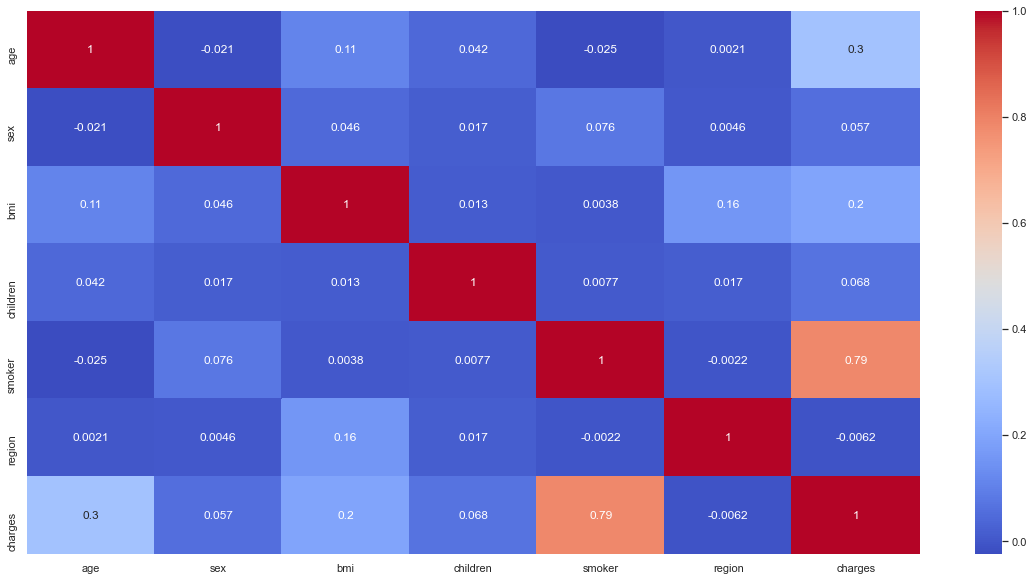

In [24]:
corr=dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()


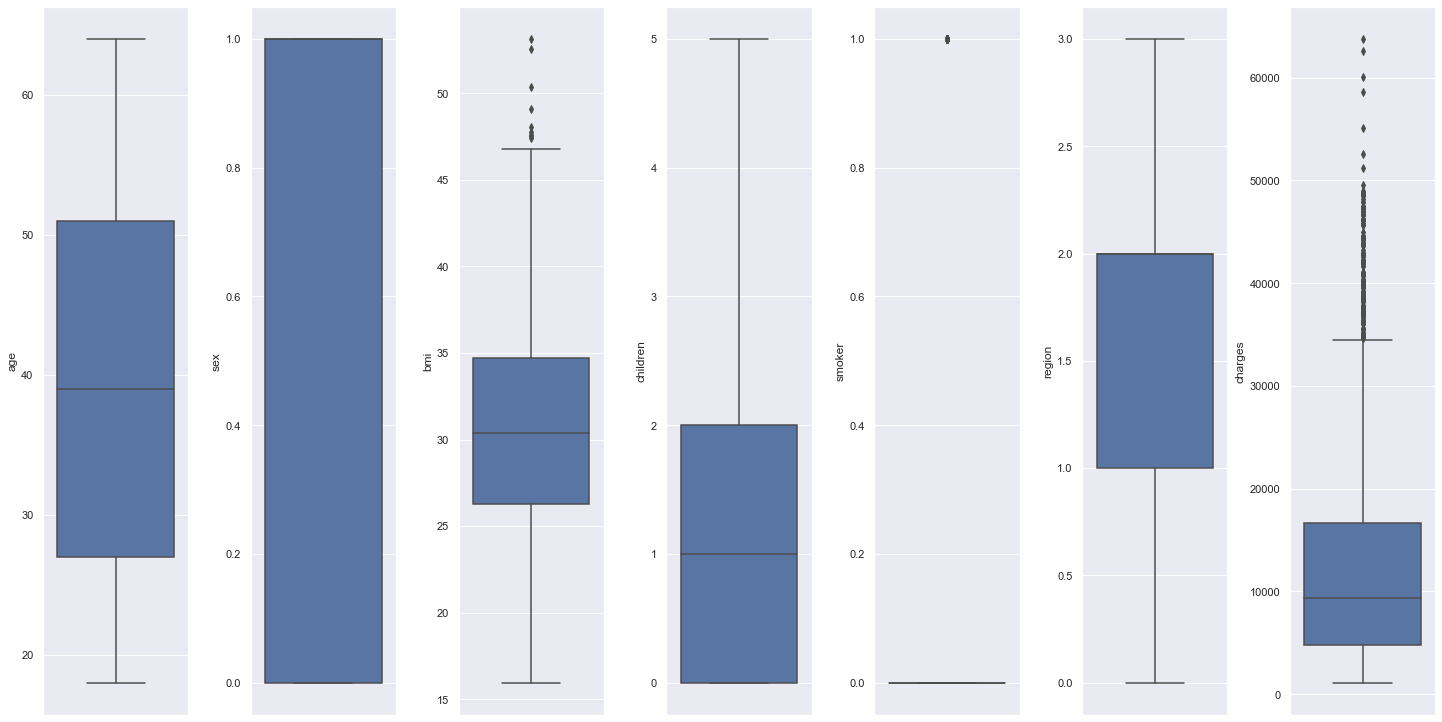

In [25]:
fig, ax=plt.subplots(ncols=7, nrows=1, figsize=(20,10))
index = 0
ax=ax.flatten()

for col, value in dataset.items():
    sns.boxplot(y=col,data=dataset,ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)


In [26]:
X=dataset.drop(columns="charges",axis=1)
Y=dataset["charges"]

In [27]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [28]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(896, 6)
(896,)
(442, 6)
(442,)


In [30]:
from sklearn.linear_model import LinearRegression

In [51]:
regressor = LinearRegression()

In [52]:
regressor = regr.fit(x_train, y_train)

In [53]:


regressor.coef_

array([  262.00518915,   129.10270377,   342.2658478 ,   373.20803797,
       23693.32775546,  -294.4964067 ])

In [54]:
regressor.intercept_

-12368.529203578068

In [55]:
y_pred = regressor.predict(x_test)

In [56]:
r2_score(y_test, y_pred)

0.7602640802497018

In [57]:
mean_absolute_error(y_test, y_pred)

4204.415654724194

In [58]:
mean_squared_error(y_test, y_pred)

35132017.869487904

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

5927.226827909313

In [60]:
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

In [61]:
y_pred

array([ 8.78466310e+03,  7.04398195e+03,  3.70004516e+04,  9.44957416e+03,
        2.70626293e+04,  1.08416736e+04,  2.11885469e+01,  1.72079962e+04,
        8.85392601e+02,  1.12435626e+04,  2.79014785e+04,  9.42461821e+03,
        5.14148294e+03,  3.85317299e+04,  4.05907383e+04,  3.72534005e+04,
        1.52350547e+04,  3.59604557e+04,  9.06848175e+03,  3.14983426e+04,
        3.47340796e+03,  1.00475901e+04,  2.26006465e+03,  7.01947703e+03,
        1.11813736e+04,  1.29649989e+04,  1.44818242e+04,  5.93562038e+03,
        9.79640231e+03,  2.20356674e+03,  8.74941063e+03,  1.31638808e+04,
        4.47939707e+03,  3.14495784e+03,  4.33040267e+03,  1.31746991e+04,
        1.65911697e+03,  8.62116160e+03,  3.32866549e+04,  3.27180611e+04,
        3.38092361e+03,  4.33343362e+03,  1.40465976e+04,  1.16384717e+04,
        8.80017206e+03,  1.21209093e+04,  5.09589990e+03,  2.73479552e+03,
        3.55620582e+04,  9.17974352e+03,  1.59730552e+04,  2.31323008e+03,
        1.23670414e+04,  

In [63]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)


In [64]:
r2_score(y_test, y_pred)

0.6963864198111107

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))


6670.303414306363

In [66]:
from sklearn.model_selection import GridSearchCV

max_depth= (None,2,4,6,8,10,12)
parameters={"max_depth":max_depth}
  
regressor=DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor,parameters,scoring="neg_mean_squared_error")
gs.fit(x_train,y_train)
    

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': (None, 2, 4, 6, 8, 10, 12)},
             scoring='neg_mean_squared_error')

In [67]:
regressor=gs.best_estimator_


In [68]:
y_pred = regressor.predict(x_test)

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred))

4709.836072263198

In [70]:
r2_score(y_test, y_pred)

0.8486293772394256

In [76]:
input_data=(31,1,25.74,0,1,0)
#chaging imputdata as numpy array
np_data=np.asarray(input_data)
#reshape array
data_reshape=np_data.reshape(1,-1)
prediction=regressor.predict(data_reshape)
print("insurance cost is",prediction)


insurance cost is [19666.41062083]


In [77]:
import pickle

In [79]:
filename = "trained_model.sav"
pickle.dump(regressor, open(filename,"wb"))

In [80]:
loaded_model=pickle.load(open("trained_model.sav","rb"))

In [81]:
input_data=(31,1,25.74,0,1,0)
#chaging imputdata as numpy array
np_data=np.asarray(input_data)
#reshape array
data_reshape=np_data.reshape(1,-1)
prediction=loaded_model.predict(data_reshape)
print("insurance cost is",prediction)


insurance cost is [19666.41062083]
